# Influence Functions via PyTorch

### 1. Configurate the system


In [59]:
config = {
        'outdir': 'outdir',
        'seed': 42,
        'gpu': 0,
        'dataset': 'CIFAR10',
        'num_classes': 10,
        'test_sample_start_per_class': False,
        'test_sample_num': 1,
        'test_start_index': 0,
        'recursion_depth': 5000,
        'r_averaging': 1,
        'scale': 25,
        'damp':0.01,
        'calc_method': 'img_wise',
        'log_filename': None,
    }

In [3]:
import pytorch_influence_functions as ptif

if __name__ == "__main__":
    config = ptif.get_default_config()
    model = load_model()
    trainloader, testloader = load_data()
    ptif.init_logging('logfile.log')
    ptif.calc_img_wise(config, model, trainloader, testloader)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.9/dist-packages/pytorch_influence_functions/influence_function.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  y = torch.nn.functional.log_softmax(y)


Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [========================================] 49999 / 50000
Calc. influence function: [========================================] 50000 / 50000
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [========================================] 49999 / 50000
Calc. influence function: [========================================] 50000 / 50000
Calc. s_test recursions: [=================================================] 1 / 1
Averaging r-times: [=======================================================] 1 / 1
Calc. influence function: [========================================] 49999 / 50000
Calc. influence function: [========================================] 50000 / 50000
Calc

Files already downloaded and verified

Label: 0 (plane)
Harmful:


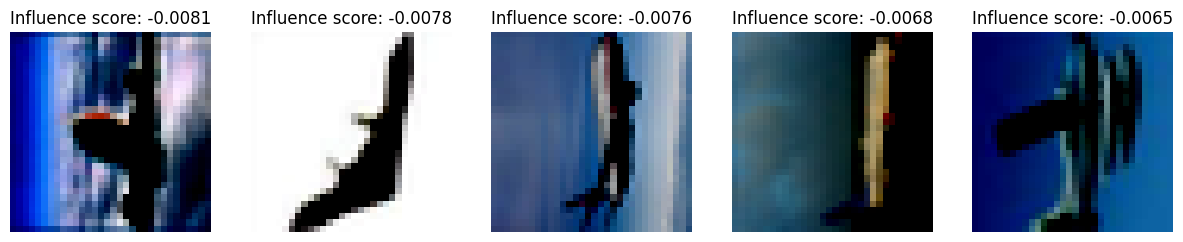

Helpful:


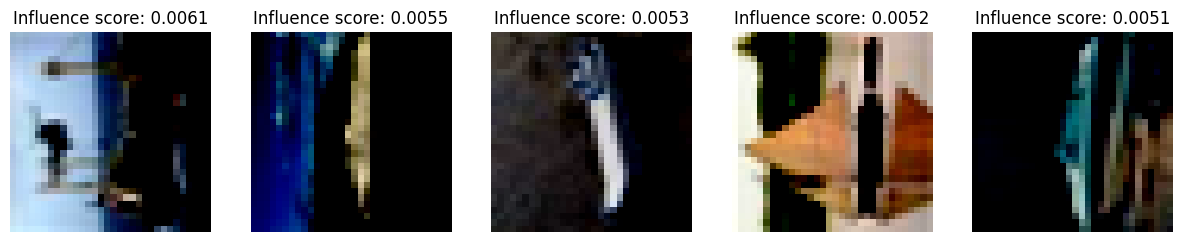


Label: 1 (car)
Harmful:


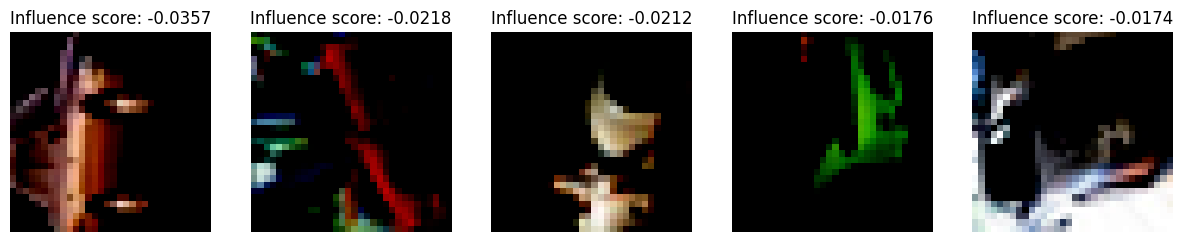

Helpful:


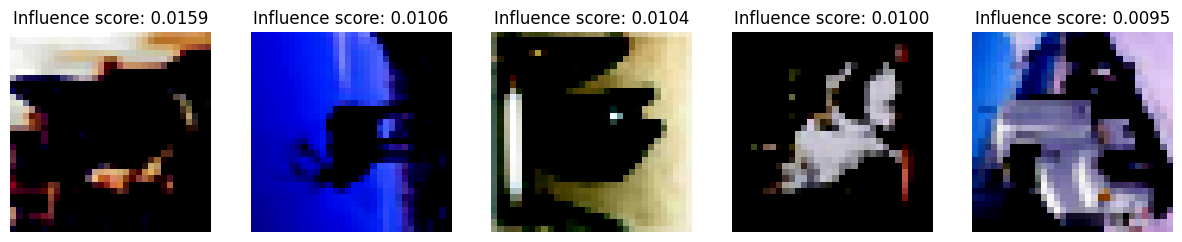


Label: 2 (bird)
Harmful:


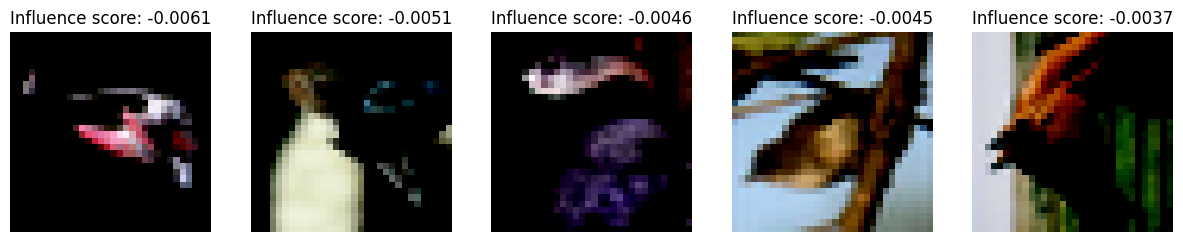

Helpful:


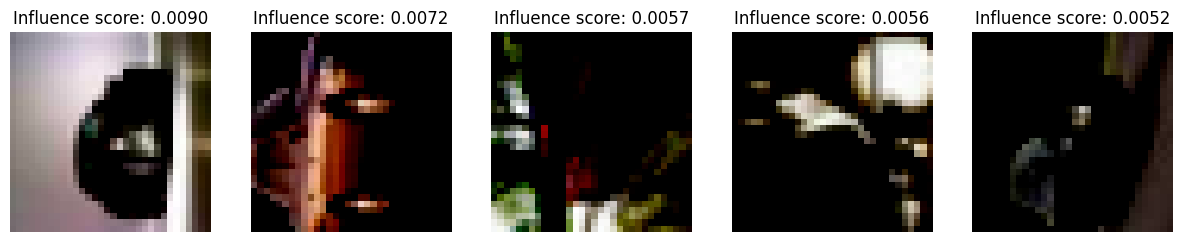


Label: 3 (cat)
Harmful:


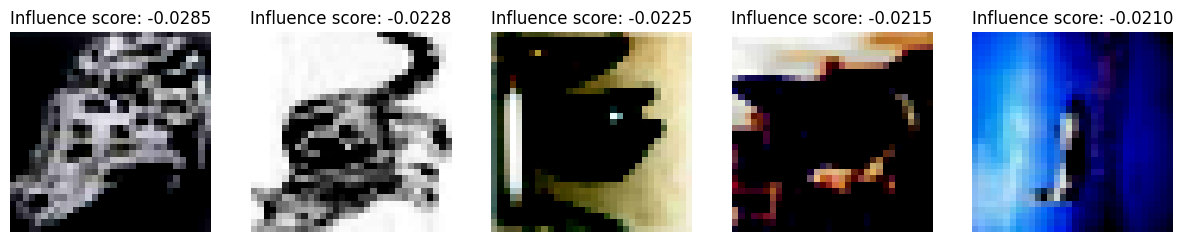

Helpful:


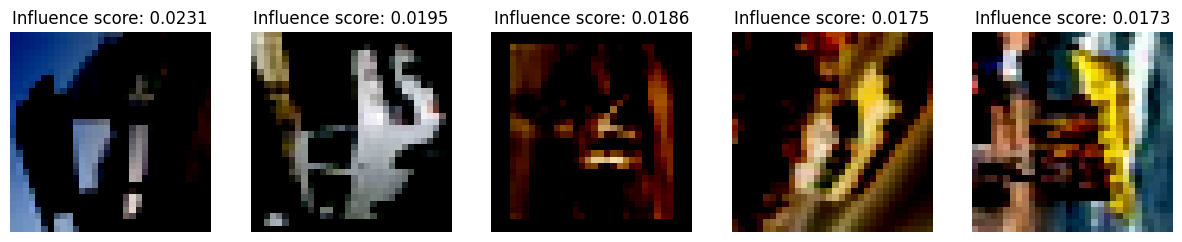


Label: 4 (deer)
Harmful:


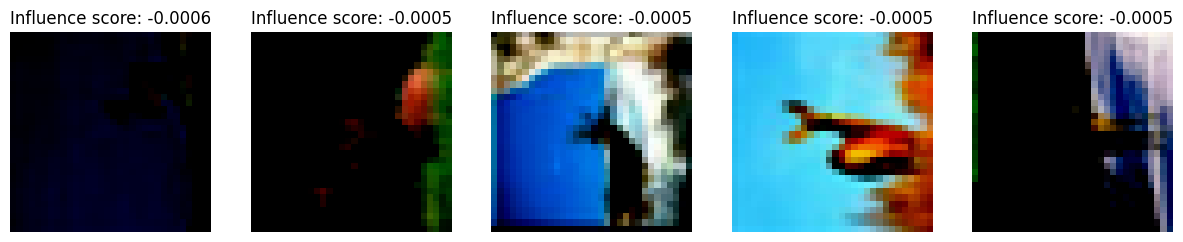

Helpful:


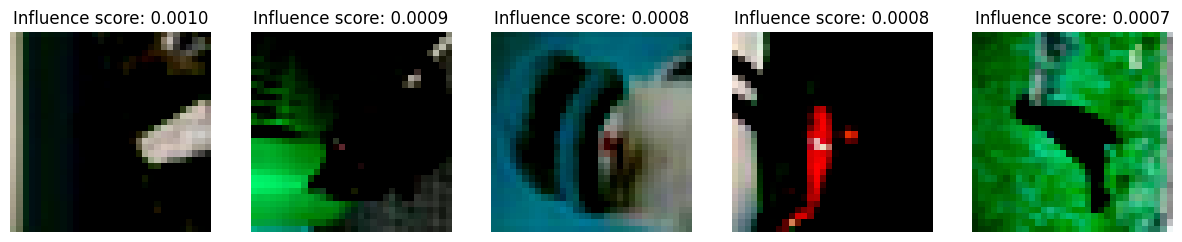


Label: 5 (dog)
Harmful:


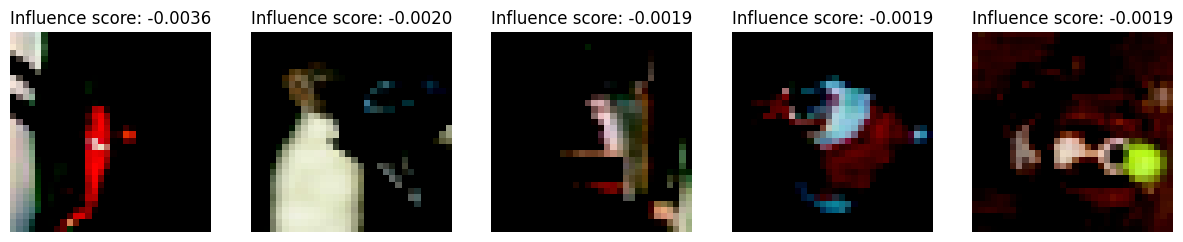

Helpful:


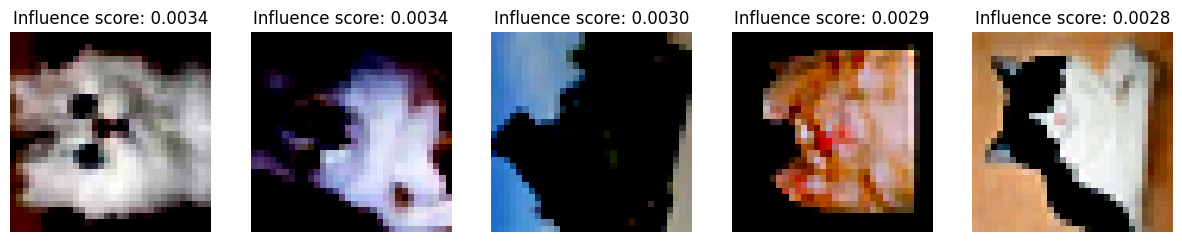


Label: 6 (frog)
Harmful:


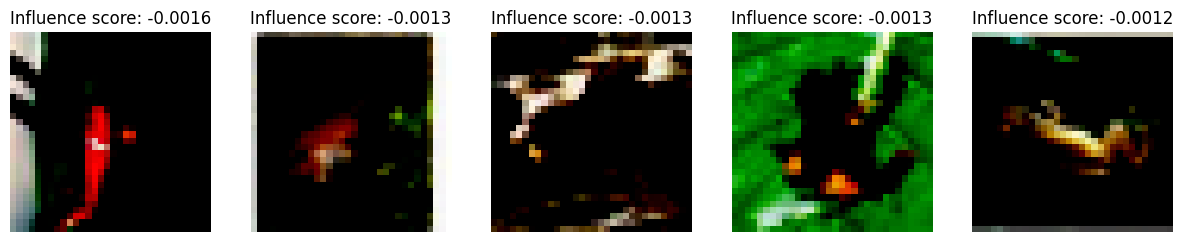

Helpful:


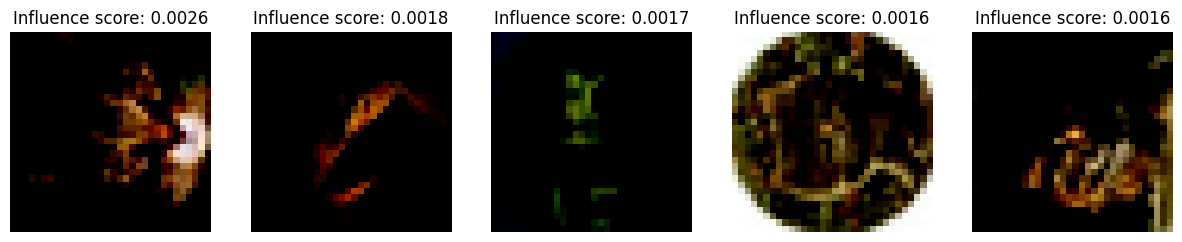


Label: 7 (horse)
Harmful:


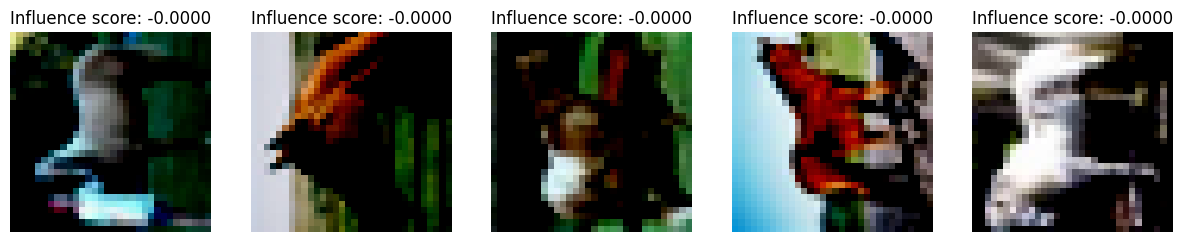

Helpful:


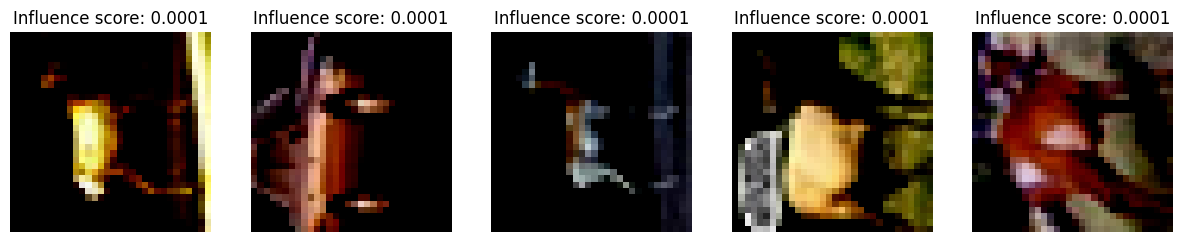


Label: 8 (ship)
Harmful:


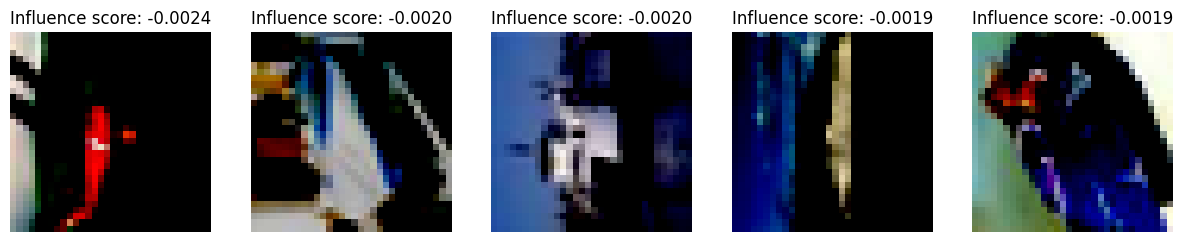

Helpful:


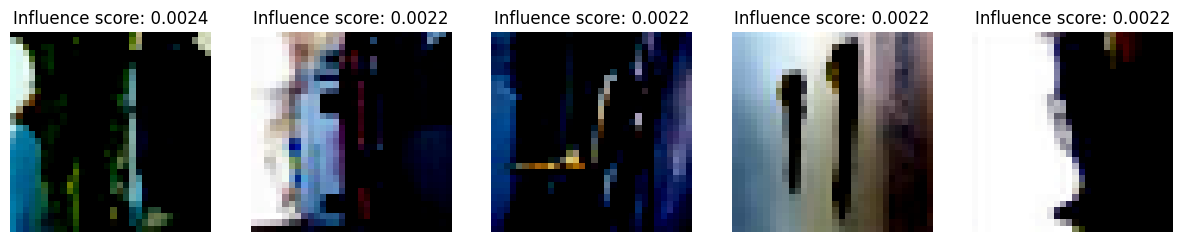


Label: 9 (truck)
Harmful:


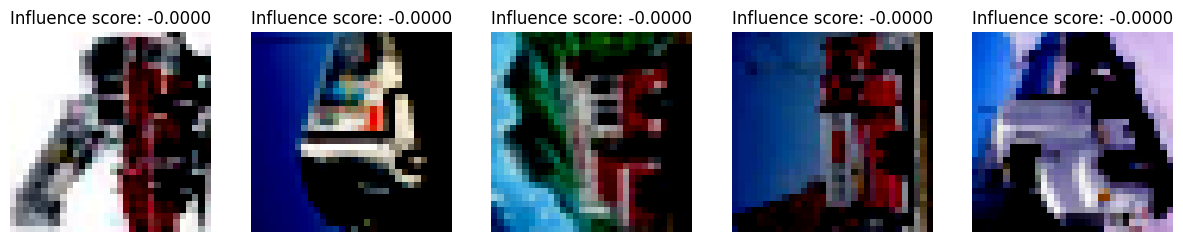

Helpful:


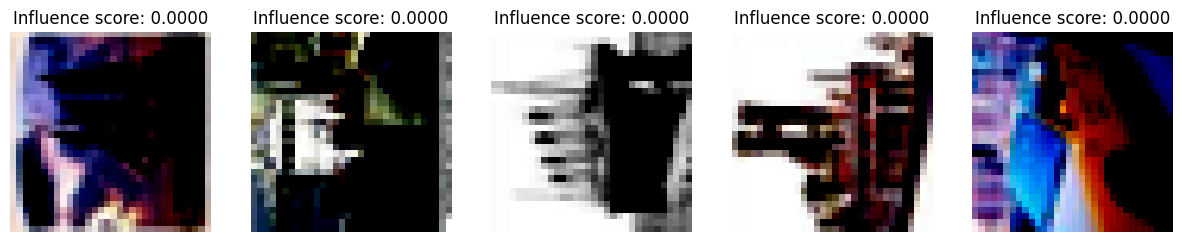

In [17]:
import json
import torch
import torchvision
import matplotlib.pyplot as plt

# Load the CIFAR10 dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Load the influence results file
with open('/content/outdir/influence_results_0_1.json', 'r') as f:
    influence_results = json.load(f)

# Loop through each label in the influence results
for label_str, results in influence_results.items():
    label = int(results['label'])
    harmful = results['harmful'][:5]
    helpful = results['helpful'][:5]
    print(f"\nLabel: {label} ({classes[label]})")
    
    # Display the first 5 harmful examples
    print("Harmful:")
    plt.figure(figsize=(15,5))
    for i, idx in enumerate(harmful):
        image, _ = trainset[idx]
        influence_score = results['influence'][idx]
        plt.subplot(1, 5, i+1)
        plt.imshow(torch.transpose(image, 0, 2).clamp(0, 1))
        plt.title(f"Influence score: {influence_score:.4f}")
        plt.axis('off')
    plt.show()
    
    # Display the first 5 helpful examples
    print("Helpful:")
    plt.figure(figsize=(15,5))
    for i, idx in enumerate(helpful):
        image, _ = trainset[idx]
        influence_score = results['influence'][idx]
        plt.subplot(1, 5, i+1)
        plt.imshow(torch.transpose(image, 0, 2).clamp(0, 1))
        plt.title(f"Influence score: {influence_score:.4f}")
        plt.axis('off')
    plt.show()


Files already downloaded and verified


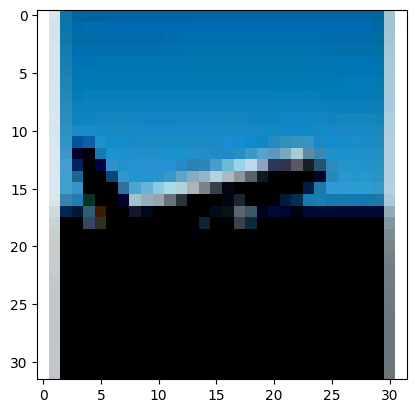

Label: 0


In [48]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the transformation to be applied to the images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the CIFAR10 training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# Get the image and its label
index = 9532

image, label = trainset[index]

# Display the image
plt.imshow(image.permute(1, 2, 0))
plt.show()

# Print the label
print("Label:", label)


In [5]:
!zip -r /content/outdir.zip /content/outdir
from google.colab import files
# Download the zip file
files.download("/content/outdir.zip")


  adding: content/outdir/ (stored 0%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_1.json (deflated 65%)
  adding: content/outdir/influence_results_0_1.json (deflated 65%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_22.json (deflated 65%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_13.json (deflated 65%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_0.json (deflated 65%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_4.json (deflated 65%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_12.json (deflated 65%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_3.json (deflated 65%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_11.json (deflated 65%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_6.json (deflated 65%)
  adding: content/outdir/influences_results_meta_0-1.json (deflated 48%)
  adding: content/outdir/influence_results_tmp_0_1_last-i_25.json (deflated 65%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import shutil

# Remove the outdir directory and all its contents
shutil.rmtree('/content/outdir')
